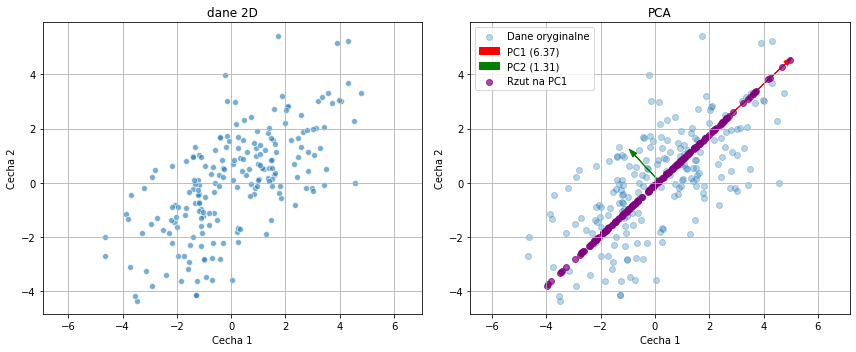

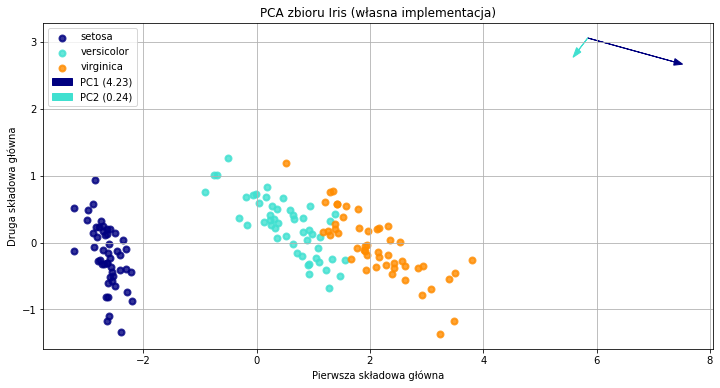

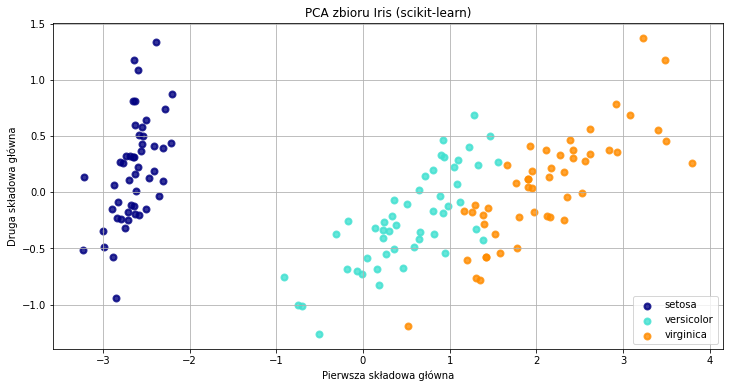

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scipy

iris = datasets.load_iris()
# zadanie 1
np.random.seed(42)
A = np.random.rand(2,10) * 2 - 1
X = np.random.randn(200,10).dot(A.T)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, edgecolors='w')
plt.title('dane 2D')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.grid(True)
plt.axis('equal')

def wiPCA(X, n_components):
    mean_col = np.mean(X, axis=0)
    centered = X - mean_col

    matrix_covariant = np.cov(centered, rowvar=False)
    vals, vects = np.linalg.eig(matrix_covariant)

    idx = np.argsort(vals)[::-1]
    vals = vals[idx]
    vects = vects[:, idx]
    components = vects[:, :n_components]

    X_cut = np.dot(centered, components)

    return X_cut, vects, vals, mean_col


X_1d, all_components, vals, mean_col = wiPCA(X, 1)  

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label='Dane oryginalne')

colors = ['r', 'g']
for i in range(2):
    plt.arrow(mean_col[0], mean_col[1],
              all_components[0, i]*vals[i], all_components[1, i]*vals[i],
              head_width=0.2, head_length=0.3, fc=colors[i], ec=colors[i],
              label=f'PC{i+1} ({vals[i]:.2f})')

X_proj = mean_col + X_1d.dot(all_components[:, 0:1].T)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c='purple', alpha=0.7, label='Rzut na PC1')

plt.title('PCA')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

# zadanie 2

iris_x = iris.data
iris_y = iris.target
targets = iris.target_names

iris_x_2d, iris_components, iris_vals, iris_mean = wiPCA(iris_x, 2)

plt.figure(figsize=(12,6))

colors = ['navy','turquoise','darkorange']
lw = 2
for color,i,target in zip(colors,[0,1,2],targets):
    plt.scatter(iris_x_2d[iris_y ==i,0],iris_x_2d[iris_y==i,1],color=color,alpha=0.8,lw=lw,label=target)

for i in range(2):
    plt.arrow(iris_mean[0], iris_mean[1],
              iris_components[0, i]*iris_vals[i], iris_components[1, i]*iris_vals[i],
              head_width=0.1, head_length=0.15, fc=colors[i], ec=colors[i],
              label=f'PC{i+1} ({iris_vals[i]:.2f})')

plt.title('PCA zbioru Iris (własna implementacja)')
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)

pca = PCA(n_components=2)
X_iris_sklearn = pca.fit_transform(iris_x)

plt.figure(figsize=(12, 6))
for color, i, target_name in zip(colors, [0, 1, 2], targets):
    plt.scatter(X_iris_sklearn[iris_y == i, 0], X_iris_sklearn[iris_y == i, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

plt.title('PCA zbioru Iris (scikit-learn)')
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)

plt.show()

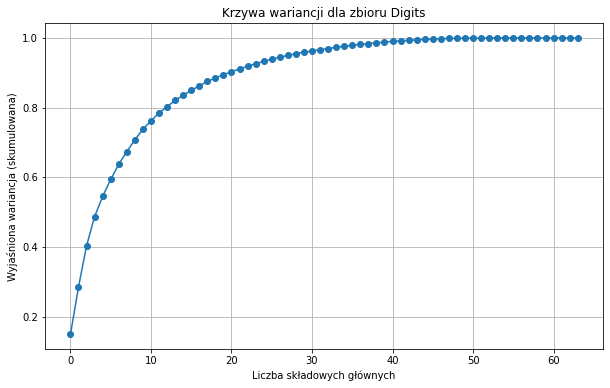

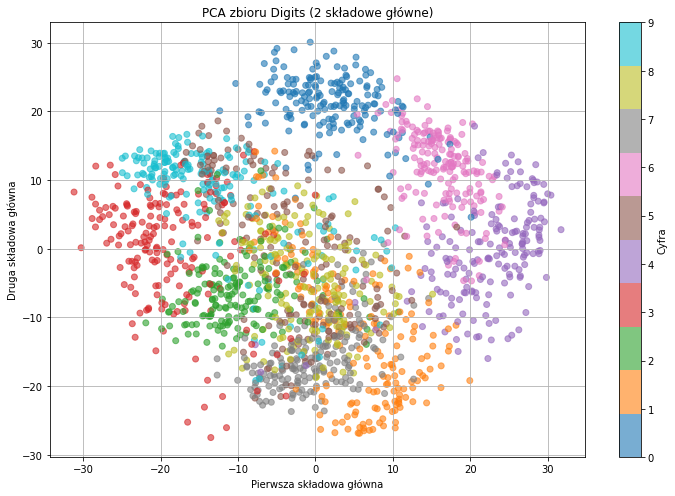

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data
y = digits.target

X_2d, components, eig_vals, mean_vec = wiPCA(X, 2)
# c
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(eig_vals) / np.sum(eig_vals), 'o-')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Wyjaśniona wariancja (skumulowana)')
plt.title('Krzywa wariancji dla zbioru Digits')
plt.grid(True)

# d
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Cyfra')
plt.title('PCA zbioru Digits (2 składowe główne)')
plt.xlabel('Pierwsza składowa główna')
plt.ylabel('Druga składowa główna')
plt.grid(True)

# zglaszam ze poleglem przy robieniu przykladu e